# <u>Regression Plots.

- Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the machine learning section of the course (To get the concept of regression line refer the previous lecture).

# <u> Imports.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

---

# <u>Data to plot.

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


---

# <u>Regression plot (regplot).

- ***Plots data and a linear regression model fit.***

- Limited to a single plot (no faceting, no automatic grouping by hue).

- Think of it as a low-level function — just scatter + regression line.

- ***Syntax: sns.regplot(x = 'col_name1', y = 'col_name2', data = df)***

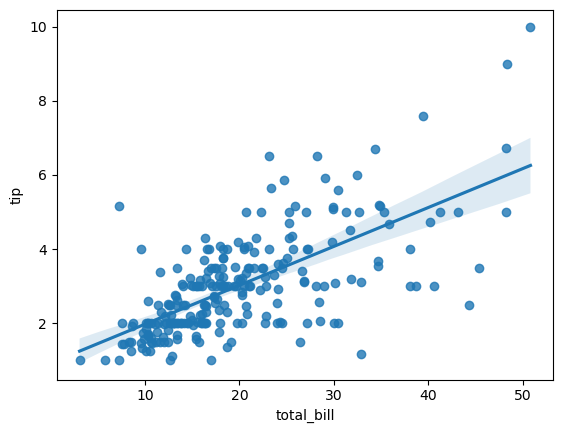

In [4]:
sns.regplot(x = 'total_bill', y = 'tip', data = tips)

plt.show()

- <u>NOTE:

    We can also do a regression plot using sns.jointplot(x = 'total_bill', y = 'tip', data = tips, kind = 'reg')

---

# <u>lmplot()

- ***Linear Model plot(lmplot) plots data and regression model fits across a FacetGrid.***

- Linear Model plot(lmplot) is built on top of regplot, but with extra functionality:

- Supports hue, col, and row arguments to split data into subplots (faceting).

- Returns a FacetGrid object, so we can create multiple regression plots across categories.

- ***Syntax: sns.lmplot(x = 'col_name1', y = 'col_name2', data = df, hue = categorical_col, palette, markers, scatter_kws, col = 'col_name3, row = 'col_name4', aspect = float, height = float)***

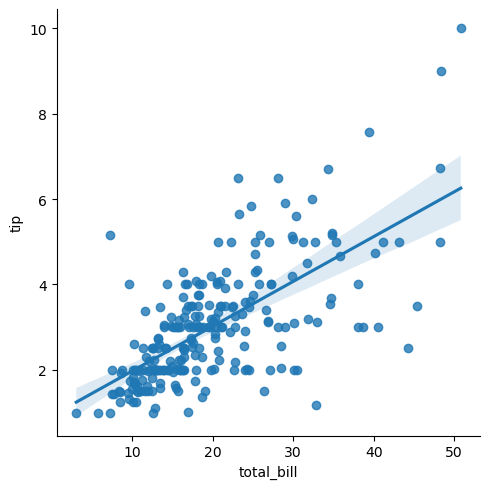

In [5]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips)

plt.show()

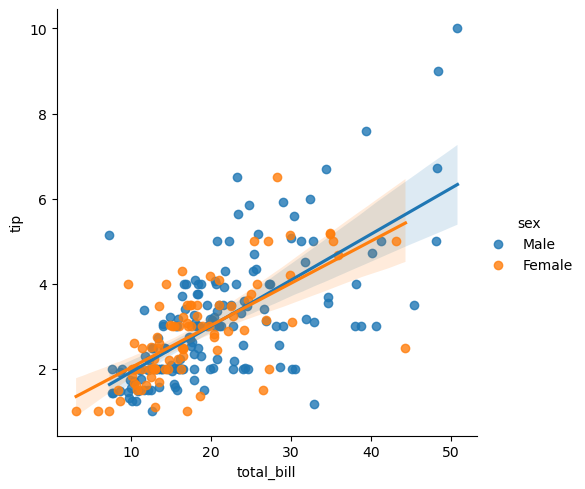

In [6]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex')

plt.show()

- <u>NOTE:

    - And now we have essentially two scatter plots and two linear fits.
    - Something to infer out of this plot is that male and female essentially have the same linear fit as far as total bill v/s tip.

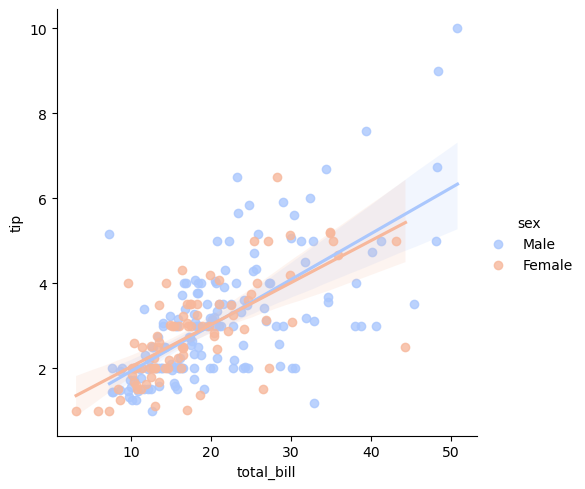

In [7]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', palette = 'coolwarm')

plt.show()

---

# <u>Working with Markers.

- We can actually begin to pass in Matplotlib style parameters such as markers if wanted to affect markers or marker types.

- ***marker argument in axes.plot() in Matplotlib:***

      Possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', 'v'
      http://matplotlib.org/api/markers_api.html - For all possible marker types(documentation).

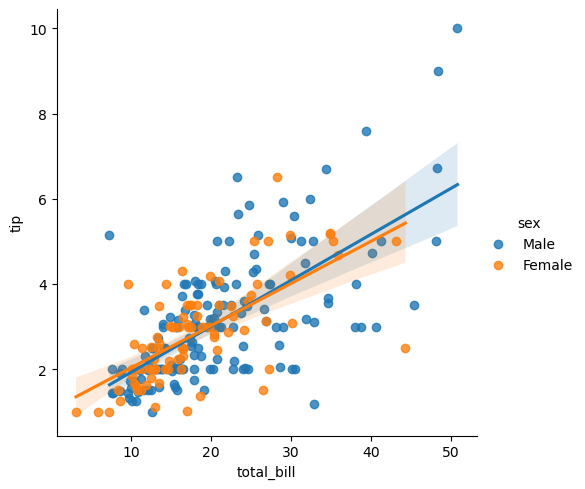

In [8]:
# Previous plot:

sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex')

plt.show()

- ***As we're dealing with a hue parameter here we're gonna need two separate markers that we can pass in as a list:***

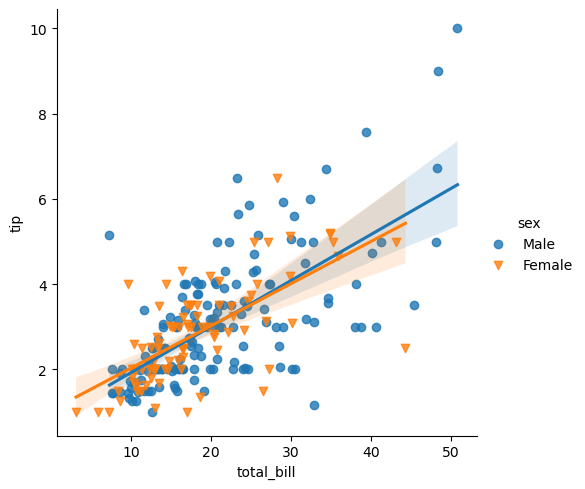

In [9]:
# Upside down triangles('v') for females and circles('o') for males.

sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers = ['o', 'v'])

plt.show()

- ***scatter_kws : {'s': value} parameter:***

If we want to affect the scatter plot in lmplot we pass in a parameter/dictionary i.e scatter_kws : {'s': value} or whatever aspect of lmplot we need to affect with matplotlib type parameters we pass in accordingly, it depends on case by case(Refer documentation).

's': value affects the size of the markers.

Allows us to pass in matplotlib parameters even more directly into the plt.scatter() call.

So what seaborn is doing with this lmplot is it's actually calling matplotlib very much under the hood.

lmplot kwargs get passed through to regplot which is a more general form of lmplot(). regplot has a scatter_kws parameter that gets passed to plt.scatter. So we want to set the s parameter in that dictionary, which corresponds (a bit confusingly) to the squared markersize. In other words we end up passing a dictionary with the base matplotlib arguments, in this case, s for size of a scatter plot. In general, we probably won't remember this off the top of our head, but instead reference the documentation.

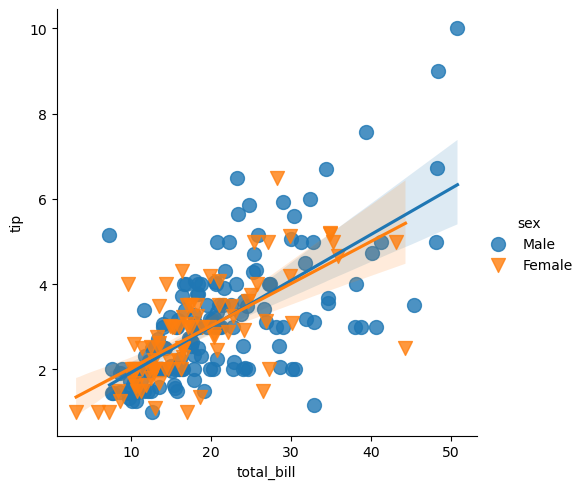

In [10]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex', markers = ['o', 'v'],
          scatter_kws = {'s': 100})

plt.show()

---

# <u>Using a Grid.

- We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

- Reference Grids notebook for col and row arguments of FacetGrid.

In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
tips['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [13]:
tips['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [14]:
tips['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

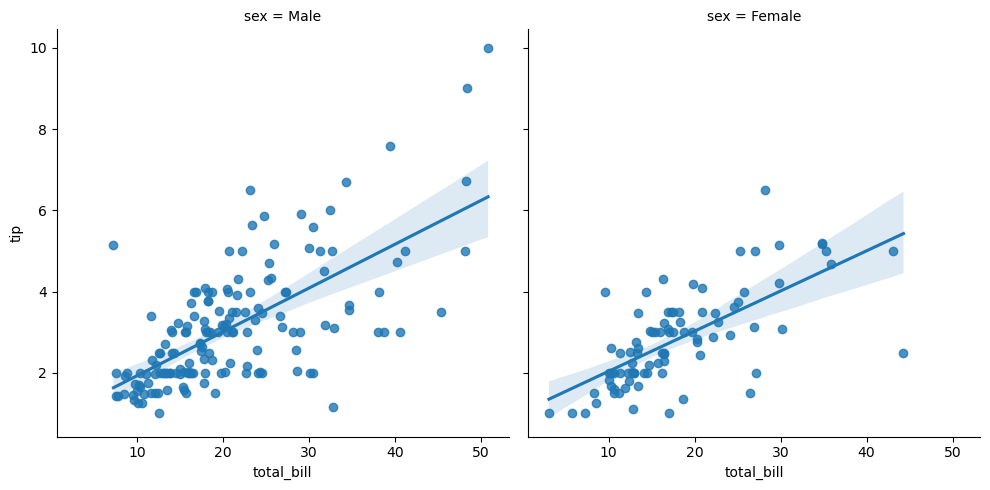

In [15]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'sex')

plt.show()

- <u>NOTE:

    Instead of seperating the scatter plot by hue like in: sns.lmplot(x = 'total_bill', y = 'tip', data = tips, hue = 'sex'), we passed in a col argument to create a FacetGrid.

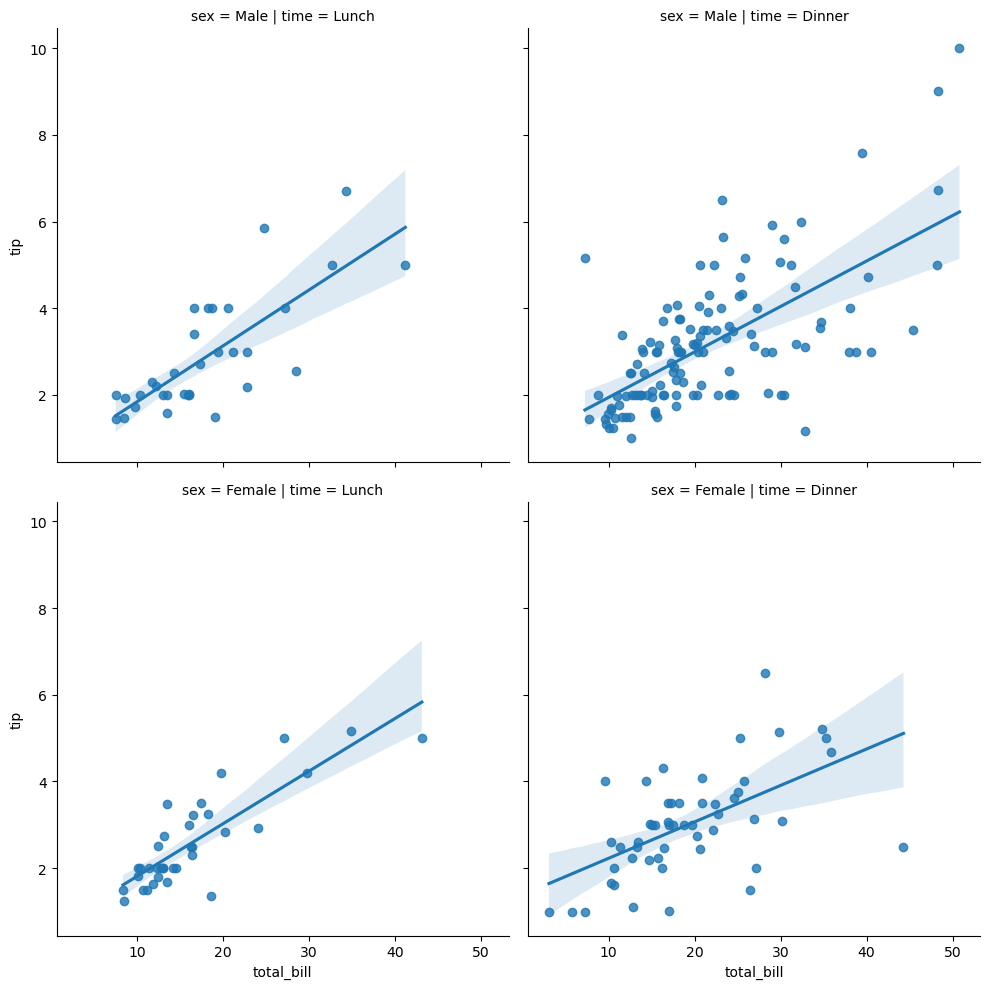

In [16]:
sns.lmplot(x = 'total_bill', y = 'tip', row = 'sex', col = 'time', data = tips)

plt.show()

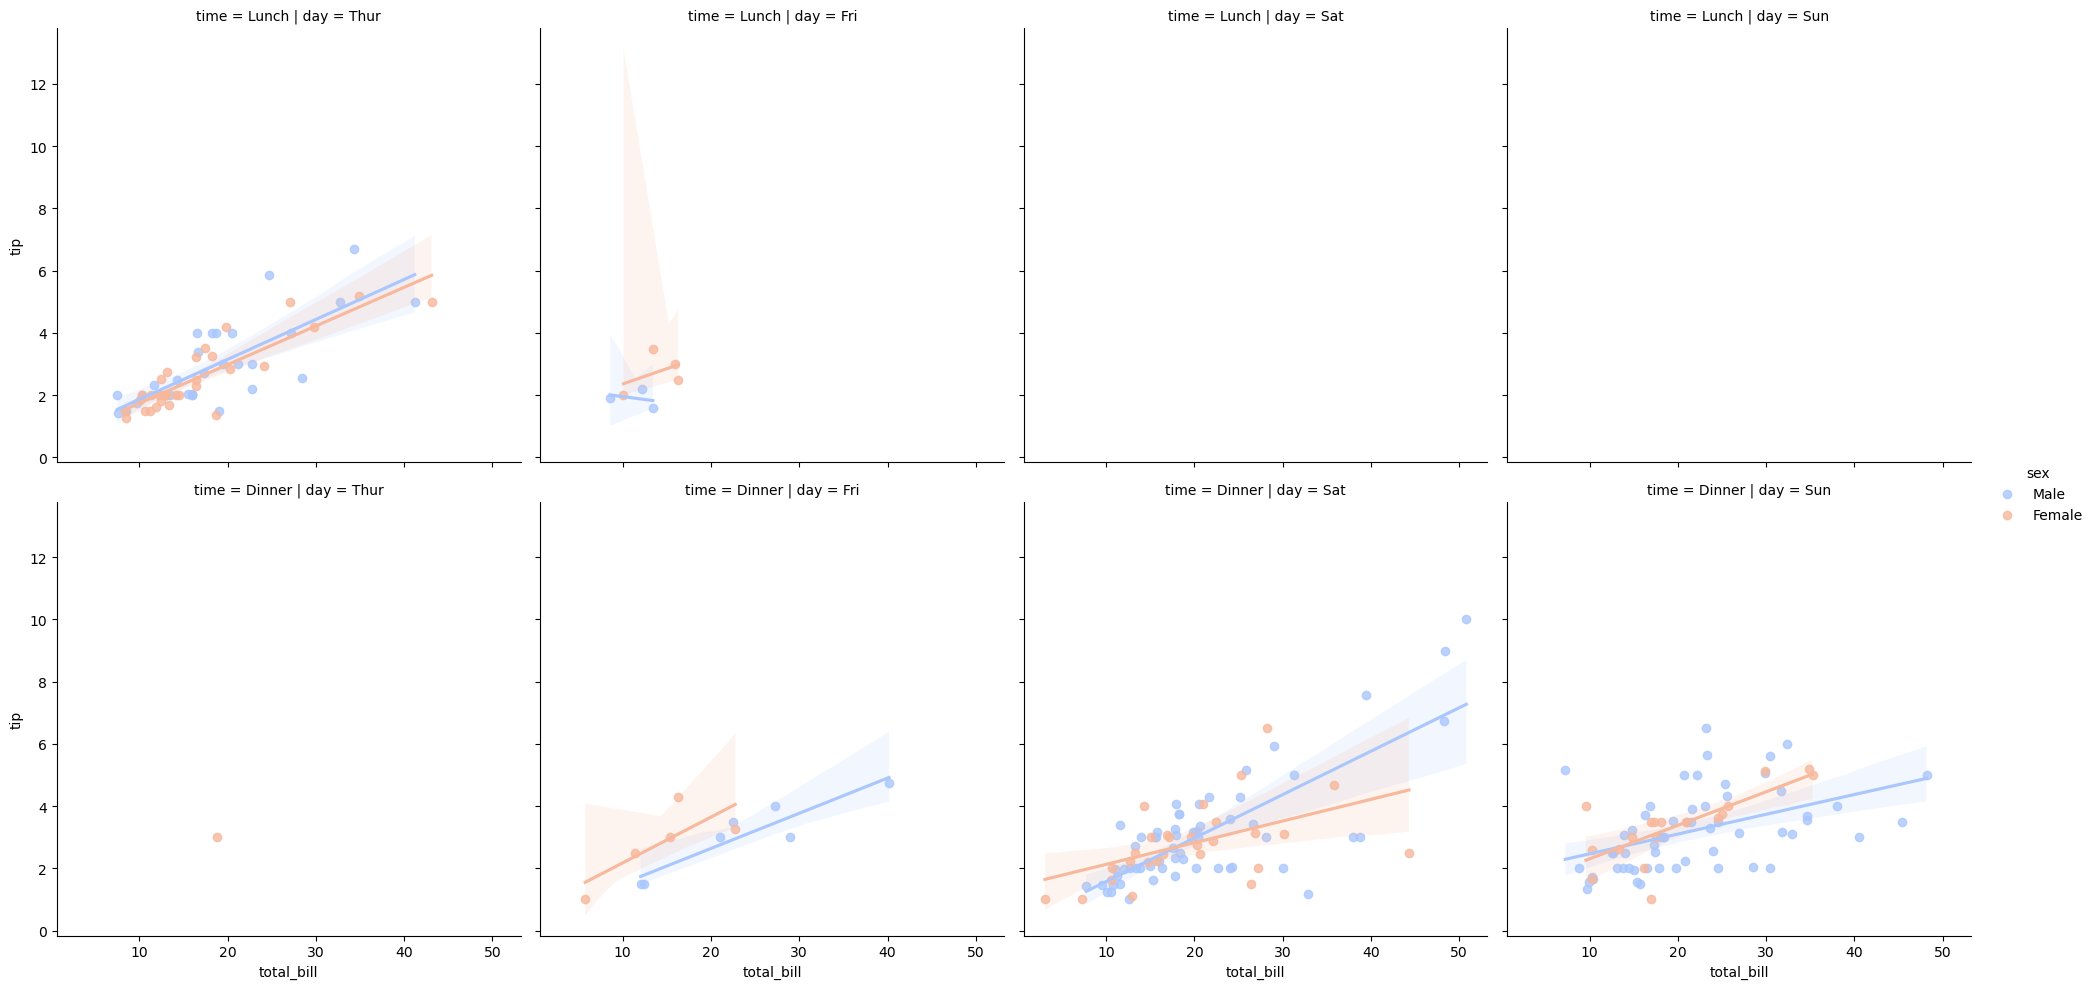

In [17]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day', row = 'time', hue = 'sex', palette = 'coolwarm')

plt.show()

- <u>NOTE:

    - So this going to give us quite an informative plot.
    - But the problem here is that the aspect and size look wrong.

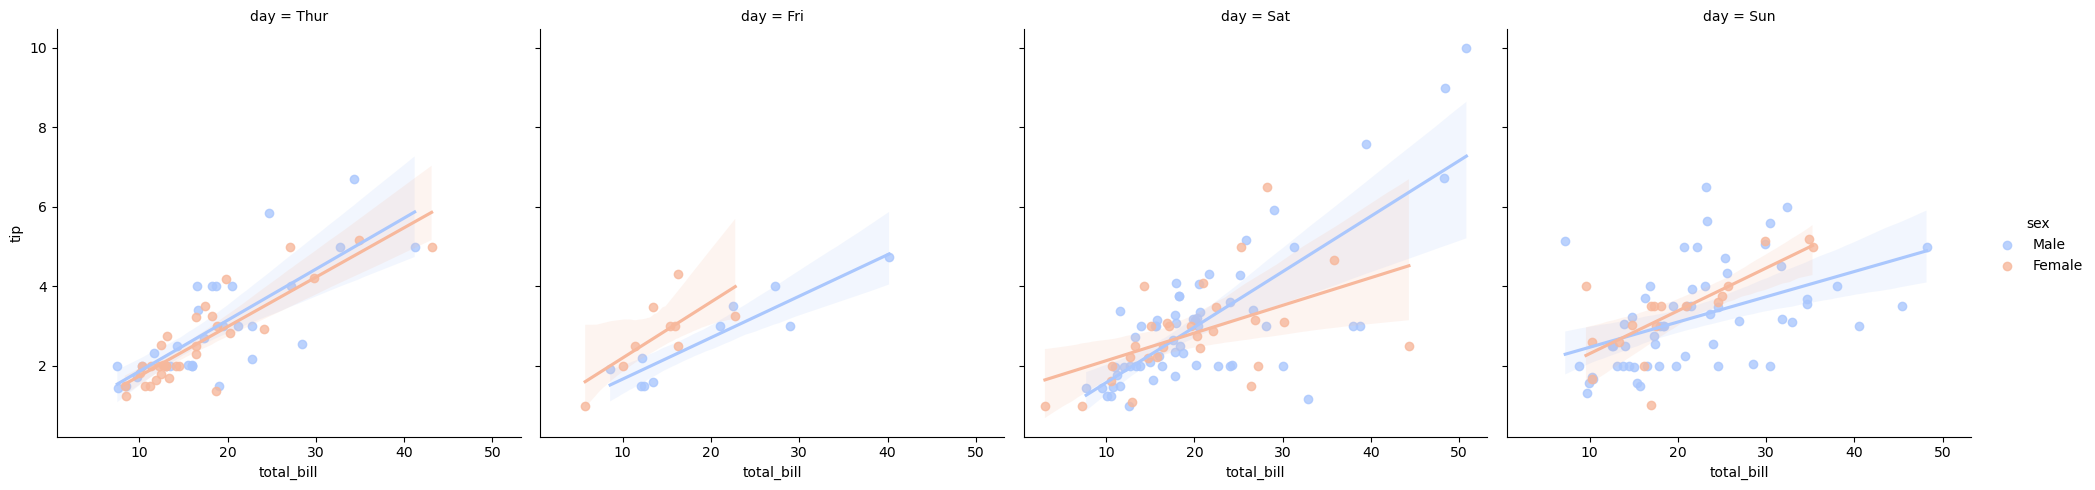

In [18]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day', hue = 'sex', palette = 'coolwarm')

plt.show()

---

# <u>Aspect and Size.

- Seaborn figures can have their size and aspect ratio adjusted with the **height** and **aspect** parameters:

- size was replaced with height, which controls the height of each facet.

- aspect controls the width-to-height ratio of each facet.

- Width = aspect × height.

- Example: if height=6 and aspect=0.6 → width = 0.6 × 6 = 3.6 inches.

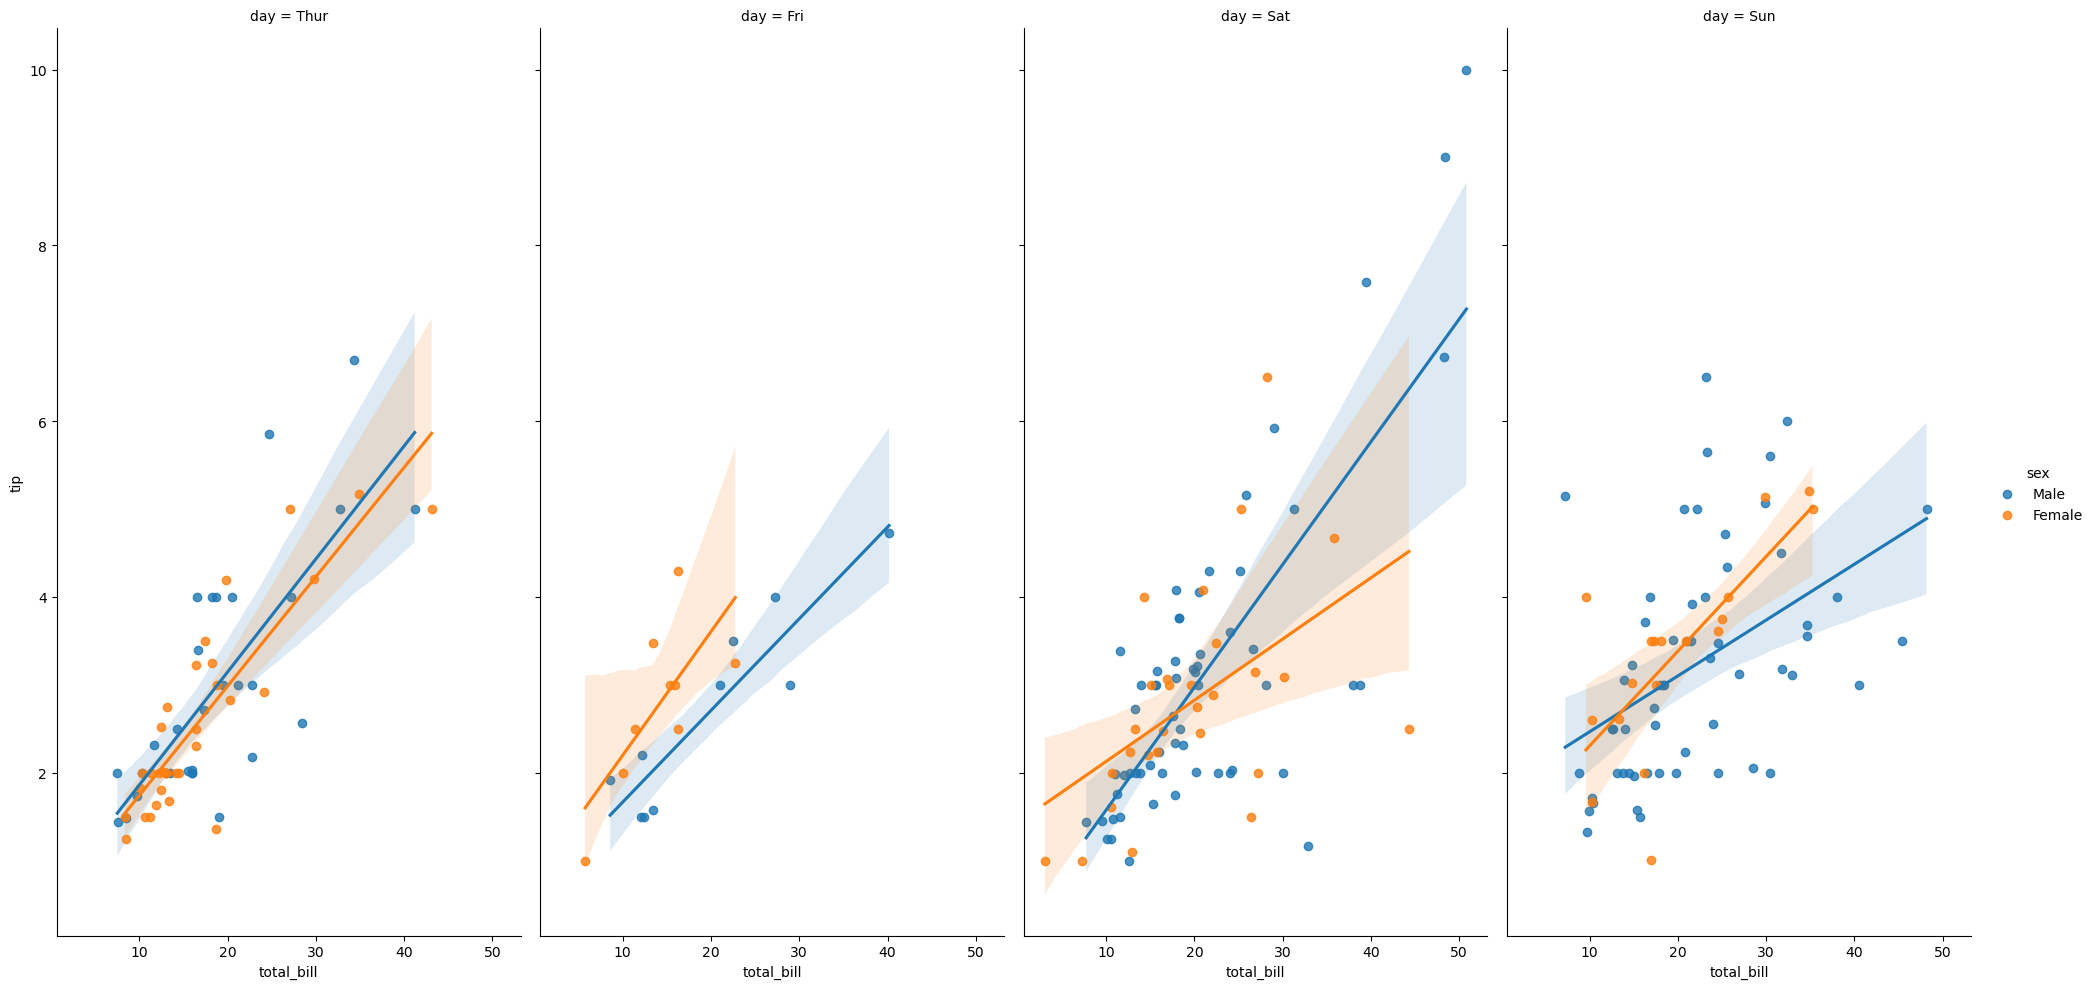

In [19]:
# Previous plot with aspect and size parameters:

sns.lmplot(x = 'total_bill', y = 'tip', data = tips, col = 'day', hue = 'sex',
           aspect = 0.5, height = 10)

plt.show()

### In order to change the font size or control the aesthetics even more, check out the Style and Color Lecture and Notebook for more info on that!

---